In [1]:


%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.metricBundles as metricBundles
from lsst.sims.maf.batches import ColMapDict

import lsst.sims.maf.plots as plots

In [2]:
dbout = {'minion_1016_sqlite.db': 'minion', 'kraken_2026.db': 'kraken', 'blob_10.db':'SLAIR'}

In [26]:
colmap1 = ColMapDict()
colmap2 = colmap1.copy()
colmap2['mjd'] = 'expMJD'
colmap2['raDecDeg'] = False

In [27]:
nside=64
results = []
for dbfile in dbout:
    if dbfile == 'minion_1016_sqlite.db':
        colmap = colmap2
    else:
        colmap=colmap1
    bundleList = []
    conn = db.OpsimDatabase(dbfile)
    outDir= dbout[dbfile]
    resultsDb = db.ResultsDb(outDir=outDir)

    slicer = slicers.HealpixSlicer(nside=nside, latCol=colmap['alt'],
                                lonCol=colmap['az'], latLonDeg=colmap['raDecDeg'], useCache=False)
    metric = metrics.CountMetric(colmap['mjd'], metricName='Nvisits as function of Alt/Az')
    sql=''
    plotFuncs = [plots.LambertSkyMap()]
    plotDict={'colorMax=': 5000}
    bundle = metricBundles.MetricBundle(metric, slicer, sql, plotFuncs=plotFuncs, runName=dbout[dbfile],
                                       plotDict=plotDict)
    bundleList.append(bundle)
    
    bd = metricBundles.makeBundlesDictFromList(bundleList)
    bg = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
    bg.runAll()
    bg.plotAll()
    results.append(bundleList[0])

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Querying database Summary with no constraint for columns ['altitude', 'expMJD', 'azimuth'].
Found 2447931 visits
Running:  ['minion_Nvisits_as_function_of_Alt_Az_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "" constraint now.


/Users/yoachim/lsstp3/python/miniconda3-4.3.21/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/yoachim/lsstp3/python/miniconda3-4.3.21/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


Plotting complete.
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Querying database SummaryAllProps with no constraint for columns ['altitude', 'observationStartMJD', 'azimuth'].
Found 2438388 visits
Running:  ['kraken_Nvisits_as_function_of_Alt_Az_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "" constraint now.
Plotting complete.
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Querying database SummaryAllProps with no constraint for columns ['altitude', 'observationStartMJD', 'azimuth'].
Found 2460691 visits
Running:  ['SLAIR_Nvisits_as_function_of_Alt_Az_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "" constraint now.
Plotting complete.


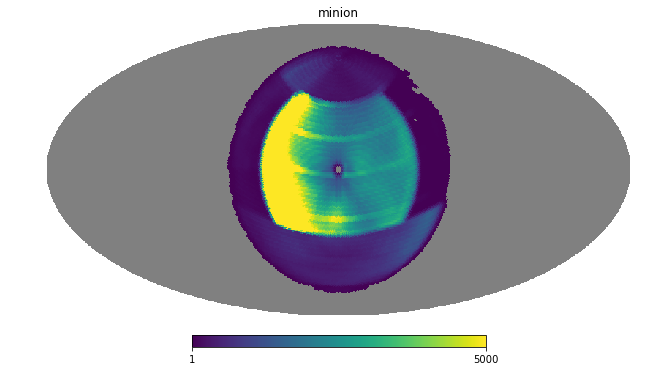

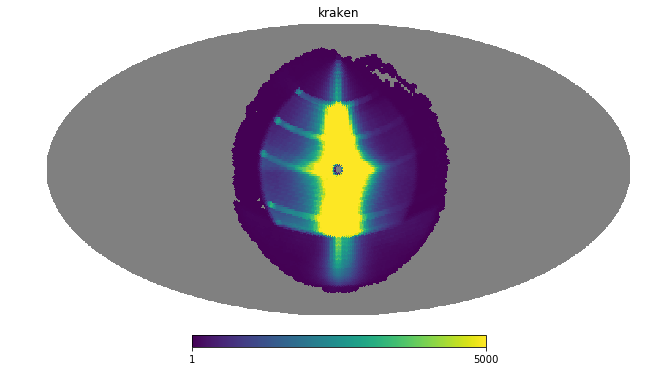

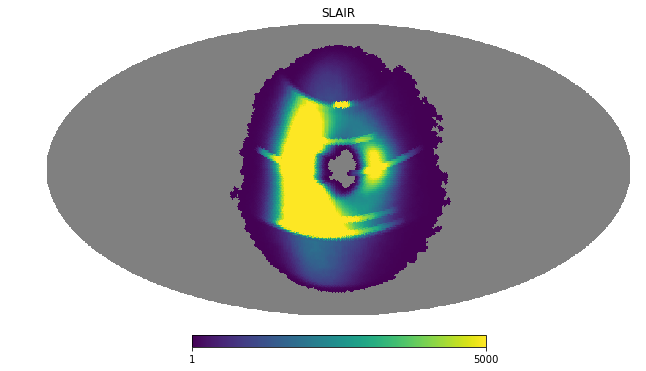

In [28]:
for result in results:
    hp.mollview(result.metricValues, rot=[0,90], max=5000, title=result.runName)